<a href="https://colab.research.google.com/github/Singhrahul2511/NLP_All_Experiment/blob/main/N_Smooth(12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P('quick'|'the') = 0.13043478260869565
P('fox'|'quick') = 0.058823529411764705
P('lazy'|'the') = 0.13043478260869565
P('barks'|'dog') = 0.1111111111111111


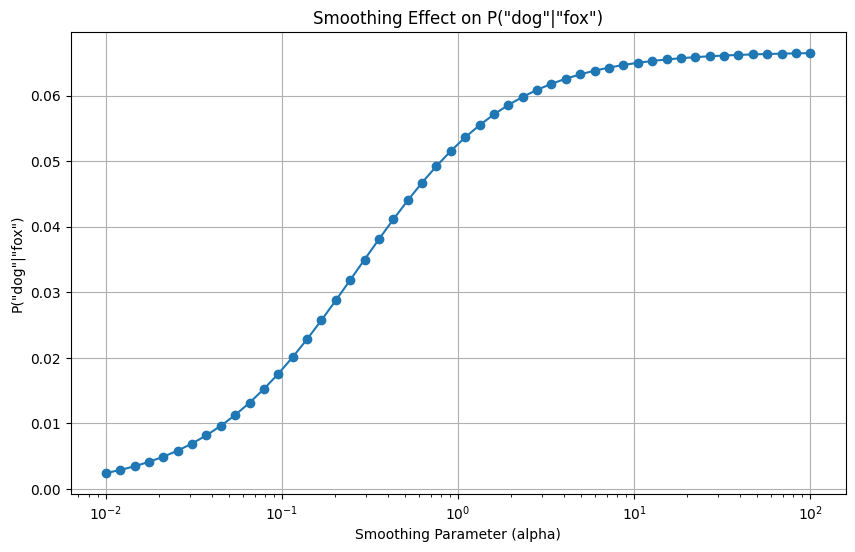

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

class BigramModel:
    def __init__(self, corpus):  # Corrected constructor method
        self.unigram_counts = defaultdict(int)
        self.bigram_counts = defaultdict(lambda: defaultdict(int))
        self.vocab = set()
        self.total_unigrams = 0
        self.train(corpus)

    def train(self, corpus):
        for sentence in corpus:
            tokens = sentence.split()
            self.total_unigrams += len(tokens)
            for i in range(len(tokens)):
                self.unigram_counts[tokens[i]] += 1
                self.vocab.add(tokens[i])
                if i < len(tokens) - 1:
                    self.bigram_counts[tokens[i]][tokens[i+1]] += 1

    def bigram_prob(self, w1, w2, alpha=1):
        bigram_count = self.bigram_counts[w1][w2] + alpha
        unigram_count = self.unigram_counts[w1] + alpha * len(self.vocab)
        return bigram_count / unigram_count

    def plot_smoothing_effect(self, w1, w2, alphas):
        probabilities = [self.bigram_prob(w1, w2, alpha) for alpha in alphas]
        plt.figure(figsize=(10, 6))
        plt.plot(alphas, probabilities, marker='o')
        plt.xscale('log')  # Using logarithmic scale for alpha
        plt.xlabel('Smoothing Parameter (alpha)')
        plt.ylabel(f'P("{w2}"|"{w1}")')
        plt.title(f'Smoothing Effect on P("{w2}"|"{w1}")')
        plt.grid(True)
        plt.show()

# Modified corpus and usage
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the dog barks loudly at the fox",
    "the quick dog outruns the fox",
    "the lazy fox sleeps under the tree"
]

bigram_model = BigramModel(corpus)

# Example bigram probabilities
print(f"P('quick'|'the') = {bigram_model.bigram_prob('the', 'quick')}")
print(f"P('fox'|'quick') = {bigram_model.bigram_prob('quick', 'fox')}")
print(f"P('lazy'|'the') = {bigram_model.bigram_prob('the', 'lazy')}")
print(f"P('barks'|'dog') = {bigram_model.bigram_prob('dog', 'barks')}")

# Example bigram probabilities
w1 = 'fox'
w2 = 'dog'
alphas = np.logspace(-2, 2, 50)  # Generate 50 alpha values from 0.01 to 100 logarithmically
bigram_model.plot_smoothing_effect(w1, w2, alphas)
